In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Overview

TensorFlow is a software library created by researchers at Google for numerical computation using data flow graphs, a programming paradigm that models a program as a directed graph of the data flowing between operations. TensorFlow's flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well. TensorFlow was open sourced under the Apache 2.0 License in November 2015. 

TensorFlow provides multiple APIs. The lowest level API --TensorFlow Core-- provides you with complete programming control. We recommend TensorFlow Core for machine learning researchers and others who require fine levels of control over their models. The higher level APIs are built on top of TensorFlow Core. These higher level APIs are typically easier to learn and use than TensorFlow Core.


To use TensorFlow, first we need to import it:

In [2]:
import tensorflow as tf

### What is a tensor?

The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitiv values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions.  Here are some examples of tensors:

* 3                                 # a rank 0 tensor; a scalar with shape []
* [1., 2., 3.]                      # a rank 1 tensor; a vector with shape [3]
* [[1., 2., 3.], [4., 5., 6.]]      # a rank 2 tensor; a matrix with shape [2, 3]
* [[[1., 2., 3.]], [[7., 8., 9.]]]  # a rank 3 tensor with shape [2, 1, 3]

### Computational graph

To do efficient numerical computing in Python, we typically use libraries like NumPy that do expensive operations such as matrix multiplication outside Python, using highly efficient code implemented in another language. Unfortunately, there can still be a lot of overhead from switching back to Python every operation. This overhead is especially bad if you want to run computations on GPUs or in a distributed manner, where there can be a high cost to transferring data.

TensorFlow also does its heavy lifting outside Python, but it takes things a step further to avoid this overhead. Instead of running a single expensive operation independently from Python, TensorFlow lets us describe a graph of interacting operations that run entirely outside Python. This approach is similar to that used in Theano or Torch.

The role of the Python code is therefore to build this external computation graph, and to dictate which parts of the computation graph should be run. A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them.  Each node takes zero or more tensors as inputs and produces a tensor as an output

One type of node is a constant op. Like all TensorFlow constants, it takes no inputs, and it outputs a value it stores internally. Let's build a simple computational graph. We can create two floating point Tensors node1 and node2 as follows:

In [3]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


Unlike NumPy that immediately performs the computation and produces the result, tensorflow only gives us a handle (of type Tensor) to a node in the graph that represents the result. 

### Sessions

To evaluate the node, we must run the computational graph within a session. A session encapsulates the control and state of the TensorFlow runtime.  The following code creates a Session object and then invokes its run method to run enough of the computational graph to evaluate node1 and node2. The computational graph can be run in a session as follows:

In [4]:
sess = tf.Session()

print(sess.run([node1, node2]))

[3.0, 4.0]


As it stands, this graph is not especially interesting because it always produces a constant result. 

### Placeholders

A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later.  To define a placeholder, we use:


In [5]:
a = tf.placeholder(tf.float32) 
b = tf.placeholder(tf.float32) 
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

### Feed dict for placeholders

To evaluate this graph we need to provide concrete values to the placeholders.  This can be accomplished by using the feed_dict argument to the run method:


In [6]:
print(sess.run(adder_node, {a: 3, b: 4.5}))
print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))

7.5
[ 3.  7.]


### Variables

In machine learning we typically want a model that can take arbitrary inputs. To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. Variables allow us to add trainable parameters to a graph. 

To declare a variable, you create an instance of the class tf.Variable with a type and initial value:

In [7]:
W = tf.Variable([.3], dtype=tf.float32) 
b = tf.Variable([-.3], dtype=tf.float32) 
x = tf.placeholder(tf.float32) 

# model
linear_model = W*x + b

However, this old way is discouraged and TensorFlow recommends that we use the wrapper tf.get_variable, which allows for easy variable sharing. With tf.get_variable, we can provide variable’s internal name, shape, type, and initializer to give the variable its initial value. 

tf.get_variable(
    name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)

### Closing a session

sessions can be closed according to:

In [8]:
sess.close()

### reseting the default graph

Continually building variables adds it to the default graph. If you don't keep track,the default graph can get bloated with unnecessary nodes.  To build a new graph, we need to reset the default graph:

In [62]:
tf.reset_default_graph()

Suppose we have data that we want to fit with a linear model to find some underlying relationship.

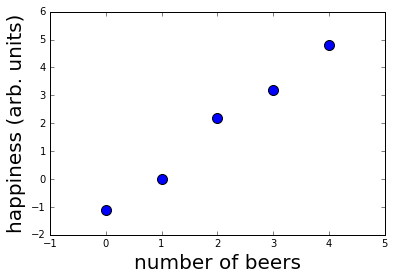

In [63]:
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([-1.1, 0.0, 2.2, 3.2, 4.8])

plt.figure()
plt.scatter(x_data, y_data, s=100)
plt.xlabel('number of beers', fontsize=20)
plt.ylabel('happiness (arb. units)', fontsize=20)

Now let's build a linear model in tensorflow

In [64]:
x = tf.placeholder(tf.float32) 

W = tf.get_variable("weight", initializer=tf.constant(.3)) 
b = tf.get_variable("bias", initializer=tf.constant(-.3))

# model
linear_model = W*x + b

# linear_model = tf.add(tf.multiply(W, x), b)

### Initialize variables

Constants are initialized when you call tf.constant, and their value can never change. By contrast, variables are not initialized when you call tf.Variable. Until we call sess.run, the variables are uninitialized.


If you try to evaluate the variables before initializing them you'll run into:


with tf.Session() as sess:
    print(W.eval(sess))

FailedPreconditionError: Attempting to use uninitialized value. 

Here are some ways to evaluate a variable:

In [65]:
sess = tf.Session()

# You can also get a variable’s value from tf.Variable.eval()
sess.run(W.assign(20))
print(W.eval(sess))

# another way to evaluate a variable
print(sess.run(W))

sess.close()

20.0
20.0


Although you can initialize individual variables or subset of variables, the easiest way is initialize all variables in a TensorFlow program at once with with:

In [66]:
sess = tf.Session()
init = tf.global_variables_initializer() 
sess.run(init)


### Set up a loss function 

We've created a model, but we don't know how good it is yet. To evaluate the model on training data, we need a y placeholder to provide the desired values, and we need to write a loss function.

A loss function measures how far apart the current model is from the provided data. We'll use a standard loss model for linear regression, which sums the squares of the errors between the model predictions and the observed data:

$\mathcal{L} = \sum_i \left(f(x) - y \right)^2$

In [67]:
y = tf.placeholder(tf.float32) 
squared_deltas = tf.square(linear_model - y) 
loss = tf.reduce_sum(squared_deltas) 

print(sess.run(loss, {x: x_data, y: y_data}))

26.22


We could improve this manually by reassigning the values of W and b. A variable is initialized to the value provided to tf.Variable but can be changed using operations like tf.assign. For example, W=-1 and b=1 are the optimal parameters for our model. We can change W and b accordingly:

In [90]:
fixW = tf.assign(W, 1.4) 
fixb = tf.assign(b, -1.) 

# print new loss
print(sess.run(loss, {x: x_data, y: y_data}))

0.37


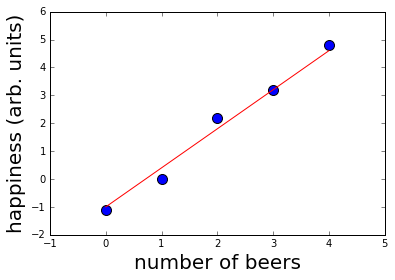

In [96]:
# get predictions
predictions = sess.run(linear_model, {x: x_data})

# plot the data and the predictions
plt.figure()
plt.scatter(x_data, y_data, s=100)
plt.xlabel('number of beers', fontsize=20)
plt.ylabel('happiness (arb. units)', fontsize=20)
plt.plot(x_data, predictions, 'r');

We guessed the a decent values of W and b, but the whole point of machine learning is to find the correct model parameters automatically. We will show how to accomplish this in the next section.

### Optimizers, otherwise known as tf.train API

Optimizer is an op whose job is to minimize loss. To execute this op, we need to pass it into the list of fetches of tf.Session.run(). When TensorFlow executes optimizer, it will execute the part of the graph that this op depends on. In this case, we see that optimizer depends on loss, and loss depends on inputs X,  Y, as well as two variables weights and bias. 

GradientDescentOptimizer means that our update rule is gradient descent. It modifies each variable according to the magnitude of the derivative of loss with respect to that variable. In general, computing symbolic derivatives manually is tedious and error-prone. TensorFlow does auto differentiation for us, then update the values of w and b to minimize the loss. TensorFlow can automatically produce derivatives given only a description of the model using the function tf.gradients. For simplicity, optimizers typically do this for you. 

By default, the optimizer trains all the trainable variables its objective function depends on. If there are variables that you do not want to train, you can set the keyword trainable=False when you declare a variable. 

Blog tutorial on autodiff: http://www.columbia.edu/~ahd2125/post/2015/12/5/


In [99]:
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss) 

sess.run(init) # reset values to incorrect defaults. 
for i in range(1000):   
    sess.run(train, {x: x_data, y: y_data}) 

# print the loss
print(sess.run(loss, {x: x_data, y: y_data}))

# print the parameters
print(sess.run([W, b]))

0.268
[1.4999993, -1.179998]


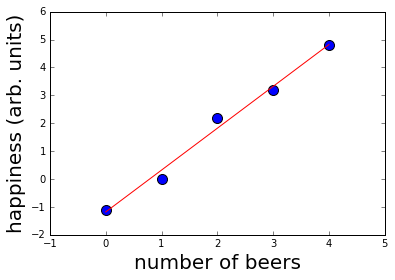

In [100]:
# get predictions
predictions = sess.run(linear_model, {x: x_data})

# plot the data and the predictions
plt.figure()
plt.scatter(x_data, y_data, s=100)
plt.xlabel('number of beers', fontsize=20)
plt.ylabel('happiness (arb. units)', fontsize=20)
plt.plot(x_data, predictions, 'r');

Voila! We did it! Woohoo! 

### Putting it all together

W: [ 1.49999928] b: [-1.17999804] loss: 0.268


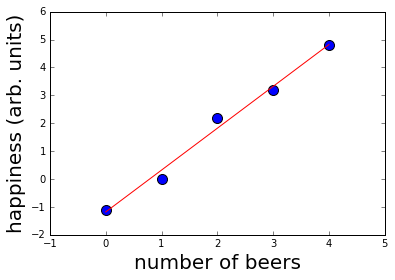

In [101]:
import tensorflow as tf

# clear the graph 
tf.reset_default_graph()

# placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Model 
linear_model = W * x + b

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares

# setup optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# start session
sess = tf.Session()

# initialize variables
init = tf.global_variables_initializer()
sess.run(init) # reset values to wrong

# training loop
for i in range(1000):
    sess.run(train, {x: x_data, y: y_data})
    
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_data, y: y_data})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

# get predictions
predictions = sess.run(linear_model, {x: x_data})

# plot the data and the predictions
plt.figure()
plt.scatter(x_data, y_data, s=100)
plt.xlabel('number of beers', fontsize=20)
plt.ylabel('happiness (arb. units)', fontsize=20)
plt.plot(x_data, predictions, 'r');

# other useful API

### Constant Ops

create a tensor of shape and all elements are zeros
* tf.zeros(shape, dtype=tf.float32, name=None)  

create a tensor of shape and type (unless type is specified) as the input_tensor but all elements are zeros
* tf.zeros_like(input_tensor, dtype=None, name=None, optimize=True) 
* tf.ones(shape, dtype=tf.float32, name=None)

* tf.ones_like(input_tensor, dtype=None, name=None, optimize=True)

* etc


### Random Constants

* tf.random_normal
* tf.random_uniform
* tf.random_shuffle
* tf.multinomial
* tf.truncated_normal
* tf.random_gamma
* tf.set_random_seed

### Math ops

Many math ops are similar to numpy. It is definitely worth checking out the documentation to make sure it performs what you think it's supposed to.  

For more details on various ops check out the API: https://www.tensorflow.org/api_docs/python/


### Gradient optimizer

* tf.train.Optimizer
* tf.train.GradientDescentOptimizer
* tf.train.AdadeltaOptimizer
* tf.train.AdagradOptimizer
* tf.train.MomentumOptimizer
* tf.train.AdamOptimizer
* tf.train.RMSPropOptimizer


### tf.estimator

tf.estimator is a high-level TensorFlow library that simplifies the mechanics of machine learning, including the following:
* running training loops
* running evaluation loops
* managing data sets


# Where to go from here

go over tensorflow tutorials:
https://www.tensorflow.org/tutorials/

check out:
* tensorboard
* tf.estimator
* tf.data
* tf.summary

building better tensorflow models:
https://danijar.com/structuring-your-tensorflow-models/

blog on gradient descent optimizers:
http://ruder.io/optimizing-gradient-descent/
